# The Sparks Foundation

## Data Science and Business Analytics.

### Task 1 : Prediction using Supervised ML

### Author: Subramanya K S

#### Predict the percentage of an student based on the no. of study hours.
Dataset:  http://bit.ly/w-data

#### import required Libraries

In [2]:
# import all libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### import and Read the Data

In [3]:
data = pd.read_csv('student_scores.csv')
df = data.copy()
# view the first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We are using simple linear regression as it involves just two variables.

#### Data Visualization and Data Cleaning

In [4]:
#getting the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#describing the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#rows and column in dataset
df.shape

(25, 2)

In [7]:
#datatypes of each columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
#check for correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


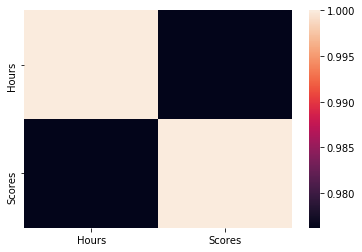

In [9]:
#heatmap to analyse correlation
sns.heatmap(df.corr())

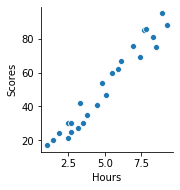

In [10]:
sns.pairplot(y_vars = 'Scores', x_vars = 'Hours' ,data = df)

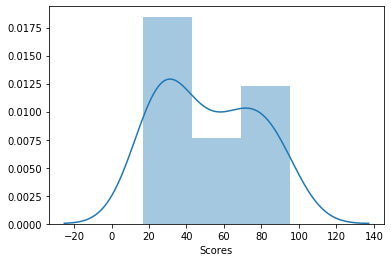

In [11]:
sns.distplot(df['Scores'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C87FE43C8>,
      dtype=object)

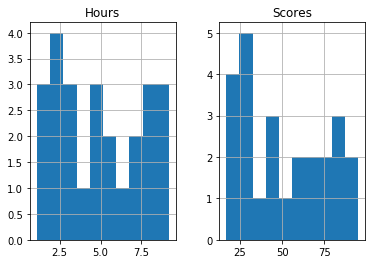

In [12]:
df.hist()

In [13]:
#checking for the null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

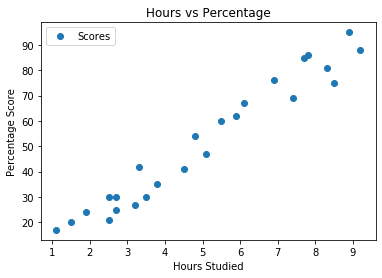

In [18]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Create dependent and Independent variable

In [15]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [16]:
print(X.shape)
print(Y.shape)

(25, 1)
(25,)


In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Split the dataset into training and testing set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


#### Apply Linear Regression to Training Data

In [22]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

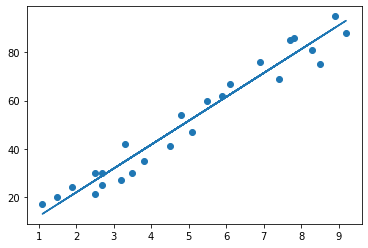

In [23]:
# Plotting the regression line
line = lreg.coef_*X+lreg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

#### Predict the Test set value

In [24]:
y_pred = (lreg.predict(X_test))
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Compare actual and Predicted Value

In [25]:
df1 = pd.DataFrame({"Actual":Y_test, "Predicted": y_pred, 'varience':Y_test-y_pred})
df1

,Actual,Predicted,varience
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [26]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

#### Finding intercept and co-efficient for linear equation

In [27]:
print(lreg.intercept_)
print(lreg.coef_)

2.018160041434683
[9.91065648]


The Linear Regression Equation is:<br>
y = 2.01816+9.911 * x 
<br>or<br>
Scores = 2.01816+9.911 * Hours of Study

#### Visualize training set

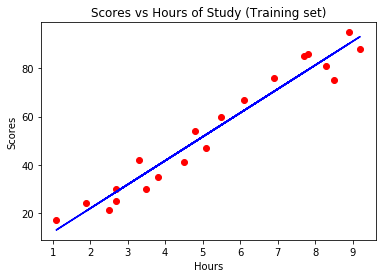

In [29]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lreg.predict(X_train), color = 'blue')
plt.title('Scores vs Hours of Study (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Visualize test set

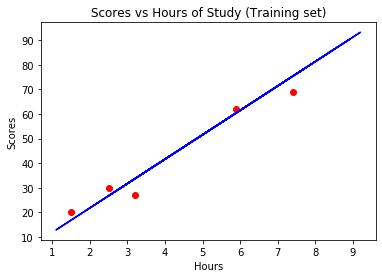

In [30]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lreg.predict(X_train), color = 'blue')
plt.title('Scores vs Hours of Study (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Evaluation of model

finding Root Mean Square Errore, Mean Square Error, Mean Absolute Eroor, R-Square.

In [32]:
print('Mean squared Error = ',metrics.mean_squared_error( Y_test, y_pred))
print('Mean absolute Error = ',metrics.mean_absolute_error( Y_test, y_pred))
print("Root Mean Square error =",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R square = ',metrics.r2_score(Y_test, y_pred))

Mean squared Error =  21.5987693072174
Mean absolute Error =  4.183859899002975
Root Mean Square error = 4.6474476121003665
R square =  0.9454906892105356


#### Training and testing Accuracy

In [33]:
print(f"Training accuracy {round(lreg.score(X_train,Y_train)*100,2)}%")
print(f"Testing accuracy {round(lreg.score(X_test,Y_test)*100,2)}%")

Training accuracy 95.16%
Testing accuracy 94.55%


#### Predicting scores when hour of stdy is 9.25

In [34]:
# You can also test with your own data
hours = 9.25
own_pred = lreg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### ________________________END____________________________________